In [1]:
# For Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [2]:
stock = 'SINA'

# Set up End and Start times for data grab
# 1 yr from now
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

globals()[stock] = DataReader(stock,'yahoo',start,end)["Adj Close"]

In [3]:
SINA.describe()

count    251.000000
mean      43.129363
std        6.713847
min       32.160000
25%       37.529998
50%       42.630001
75%       48.000000
max       60.740002
Name: Adj Close, dtype: float64

In [4]:
adj_close_now=SINA[-1]

In [5]:
print("调整后的当前新浪财经个股收盘价是 %s  " % (adj_close_now))

调整后的当前新浪财经个股收盘价是 45.5  


In [6]:
SINA

Date
2015-01-26    37.070000
2015-01-27    36.950001
2015-01-28    36.630001
2015-01-29    36.240002
2015-01-30    36.220001
2015-02-02    36.299999
2015-02-03    37.020000
2015-02-04    37.549999
2015-02-05    37.270000
2015-02-06    37.020000
2015-02-09    36.849998
2015-02-10    36.799999
2015-02-11    37.150002
2015-02-12    37.779999
2015-02-13    38.369999
2015-02-17    38.230000
2015-02-18    38.119999
2015-02-19    38.340000
2015-02-20    37.830002
2015-02-23    37.389999
2015-02-24    37.750000
2015-02-25    37.669998
2015-02-26    37.389999
2015-02-27    37.119999
2015-03-02    36.750000
2015-03-03    36.759998
2015-03-04    36.810001
2015-03-05    37.240002
2015-03-06    36.910000
2015-03-09    36.500000
                ...    
2015-12-09    49.970001
2015-12-10    47.770000
2015-12-11    46.139999
2015-12-14    46.939999
2015-12-15    48.410000
2015-12-16    48.779999
2015-12-17    49.209999
2015-12-18    49.750000
2015-12-21    50.770000
2015-12-22    50.599998
2015-12-23 

Skewness of 该时间序列  = 0.49
daily_return_skewness  = 1.59


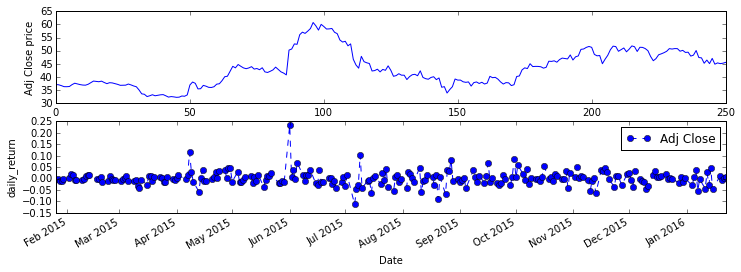

In [7]:
from scipy.stats import skew
def get_skewness(time_series):
    time_series_skewness = skew(time_series)
    print("Skewness of 该时间序列  = %.2f" % time_series_skewness)    
    daily_return=time_series.pct_change()
    daily_return_skewness = skew(daily_return.dropna())
    print("daily_return_skewness  = %.2f" % daily_return_skewness)
    plt.figure(num=2, figsize=(9, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time_series)
    plt.xlabel("stock_price_skewness")
    plt.ylabel("Adj Close price")
    plt.subplot(2, 1, 2)
    plt.ylabel("daily_return")
    daily_return.plot(figsize=(12,4),legend=True,linestyle='--',marker='o')
    return time_series_skewness,daily_return_skewness


time_series_skewness,daily_return_skewness= get_skewness(SINA)